#### Bike  and Car Classification Exercise

##### Required Modules

In [9]:
#import required modules
import tensorflow as tf
from PIL import Image
from random import shuffle, choice
import numpy as np
import os
import datetime
from matplotlib import pyplot as plt


##### One-Hot Encode Labels

In [4]:
#One hot encode labels
IMAGE_SIZE = 256 
def one_hot_encode(className):
  '''One-hot encodes a given class'''
  if className == 'cars':return np.array([1,0])
  elif className =='motorcycles': return np.array([0,1])

print(f'Cars: {one_hot_encode('cars')}')
print(f'Motorcycles: {one_hot_encode('motorcycles')}')

Cars: [1 0]
Motorcycles: [0 1]


#### Load data Method

In [5]:
#load data
IMAGE_DIRECTORY = 'exdataset/training_set'
def load_data (IMAGE_DIRECTORY, number_of_images = 120, shuffle_data = True):
  '''Loads the required image data'''
  print('loading images...')
  train_data =[]
  folders = next(os.walk(IMAGE_DIRECTORY))[1] # getting the sub directories
  
  for folder_name in folders:
    print(f'loading {folder_name}')
    file_names = next(os.walk(os.path.join(IMAGE_DIRECTORY, folder_name)))[2]
    for i in range(number_of_images):
      image_name = choice(file_names)
      image_path=os.path.join(IMAGE_DIRECTORY, folder_name, image_name)
      #print(image_path)
      label = one_hot_encode(folder_name)
      class_name =folder_name
      if "DS_Store" not in  image_path:
        img = Image.open(image_path) #Image.open() is part of the PILLOW library
        img = img.convert('L')
        img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.LANCZOS)
        train_data.append([np.array(img), label, class_name]) # class name is only needed for visualisation 
  if(shuffle_data == True):
    shuffle(train_data)
  print(f'we loaded, {len(train_data)}, images in the training dataset')
  return train_data

##### Visualise Data

In [20]:
#Calculate loading time
t0 = datetime.datetime.now()
train_data = load_data(IMAGE_DIRECTORY, number_of_images=120)
t1 = datetime.datetime.now()
print(f'Time taken to load:{t1-t0}')





loading images...
loading cars
loading motorcycles
we loaded, 240, images in the training dataset
Time taken to load:0:00:00.479590


label [1 0]
class name: cars


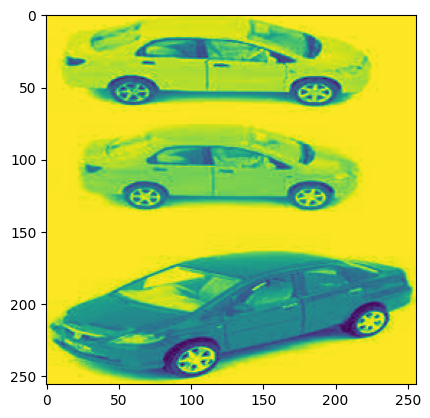

In [21]:
image_index =15
label = train_data[image_index][1]
class_name = train_data[image_index][2]
np_image =train_data[image_index][0]
print(f'label {label}')
print(f'class name: {class_name}')
image = plt.imshow(np_image) #display the image itself